Here are classes for call and put options:

In [14]:
class option:
    def __init__(self, strike, expiration, option_type):
        self.strike = strike
        self.expiration = expiration
        self.option_type = option_type
        
    def set_premium(self, premium):
        self.premium = premium
        
    def get_premium(self):
        return self.premium
        
    def get_strike(self):
        return self.strike
     
    def get_mark(self, spot):
        return self.get_intrinsic_value(spot) - self.premium
    
    def get_intrinsic_value(self, spot):
        pass
        
    def __str__(self):
        return self.option_type + ' s=' + '{0:.2f}'.format(self.strike) + ' e=' + '{0:.2f}'.format(self.expiration)

class call_option(option):
    def __init__(self, strike, expiration):
        option.__init__(self, strike, expiration, 'call')
    
    def get_intrinsic_value(self, spot):
        return max(spot - self.strike, 0)
   
class put_option(option):
    def __init__(self, strike, expiration):
        option.__init__(self, strike, expiration, 'put')
    
    def get_intrinsic_value(self, spot):
        return max(self.strike - spot, 0)

c = call_option(10.50, 30)
p = put_option(10.50, 30)
print(c,p)

call s=10.50 e=30.00 put s=10.50 e=30.00


If I ask for the premium, I need to set it first...

In [15]:
c.set_premium(0.32)
c.get_premium()

0.32

In [17]:
c.get_mark(12.75)

1.93

In [18]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

spot = np.linspace(0,20,101)
spot

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. ])

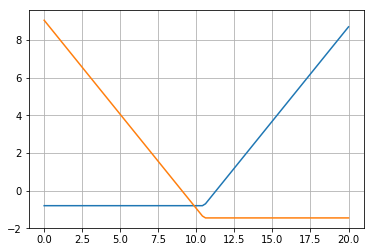

In [25]:
c = call_option(10.50, 30)
c.set_premium(0.80)
call_mark = [c.get_mark(s) for s in spot]

p = put_option(10.50, 30)
p.set_premium(1.45)
put_mark = [p.get_mark(s) for s in spot]

call_mark

fig, ax = plt.subplots()
ax.plot(spot, call_mark, spot, put_mark)
ax.grid(True, zorder=5)
plt.show()
